In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import StockHistory
import seaborn as sns

In [29]:
names = StockHistory.get_namad_list()

In [42]:
sec_data = pd.DataFrame()
for n in names["NAMAD"]:
    d = StockHistory.get_namad_history_by_name(n,start_date='1390-1-1',from_cache=True)["ClosePrice"]
    if len(d) > 1000:
        sec_data[n] = d
sec_data.head()

,فسا,فرآور,سبزوا,وبملت,لپيام,ثنام,وآذر,حسينا,رتكوح,غدام,...,بكاب,البرز,ختوقا,دپارس,هرمز,شخارك,دبالك,قشير,ومهر,ولصنم
0,836.0,38027.0,2189.0,3196.0,3300.0,1727.0,5793.0,12431.0,6796.0,25506.0,...,13976.0,1310.0,1793.0,9459.0,5982.0,46749.0,3487.0,5246.0,1000.0,1498.0
1,785.0,38297.0,2218.0,3063.0,3300.0,1732.0,5693.0,11910.0,6572.0,25890.0,...,13311.0,1308.0,1807.0,9745.0,5899.0,46170.0,3546.0,5009.0,1000.0,1488.0
2,786.0,37720.0,2148.0,3089.0,3101.0,1692.0,5555.0,11737.0,6576.0,25705.0,...,12678.0,1252.0,1790.0,9312.0,5857.0,45961.0,3381.0,4906.0,1000.0,1484.0
3,782.0,37686.0,2234.0,3047.0,3143.0,1687.0,5304.0,11635.0,6652.0,25529.0,...,12088.0,1228.0,1780.0,8917.0,5693.0,45947.0,3235.0,4894.0,1000.0,1480.0
4,799.0,37994.0,2343.0,3092.0,3143.0,1713.0,5304.0,11938.0,6989.0,25400.0,...,11513.0,1275.0,1817.0,9273.0,5699.0,45975.0,3324.0,5091.0,1000.0,1525.0


In [43]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns.head()

,فسا,فرآور,سبزوا,وبملت,لپيام,ثنام,وآذر,حسينا,رتكوح,غدام,...,بكاب,البرز,ختوقا,دپارس,هرمز,شخارك,دبالك,قشير,ومهر,ولصنم
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.062945,0.007075,0.013161,-0.042505,0.000000,0.002891,-0.017413,-0.042815,-0.033516,0.014943,...,-0.048751,-0.001528,0.007778,0.029788,-0.013972,-0.012463,0.016778,-0.046230,0.0,-0.006698
2,0.001273,-0.015181,-0.032069,0.008453,-0.062198,-0.023366,-0.024539,-0.014632,0.000608,-0.007171,...,-0.048723,-0.043757,-0.009452,-0.045450,-0.007145,-0.004537,-0.047649,-0.020777,0.0,-0.002692
3,-0.005102,-0.000902,0.039257,-0.013690,0.013453,-0.002959,-0.046237,-0.008728,0.011491,-0.006870,...,-0.047655,-0.019355,-0.005602,-0.043344,-0.028400,-0.000305,-0.044143,-0.002449,0.0,-0.002699
4,0.021506,0.008140,0.047638,0.014661,0.000000,0.015294,0.000000,0.025709,0.049420,-0.005066,...,-0.048736,0.037559,0.020573,0.039147,0.001053,0.000609,0.027140,0.039464,0.0,0.029952


In [46]:
corr = sec_returns.corr()
corr

,فسا,فرآور,سبزوا,وبملت,لپيام,ثنام,وآذر,حسينا,رتكوح,غدام,...,بكاب,البرز,ختوقا,دپارس,هرمز,شخارك,دبالك,قشير,ومهر,ولصنم
فسا,1.000000,0.121874,0.054486,0.042943,0.073367,0.068182,-0.009821,0.036573,-0.005195,-0.005368,...,0.073371,0.009687,0.080774,0.013910,0.092527,0.065290,0.019052,0.029035,0.061948,0.064301
فرآور,0.121874,1.000000,0.072165,0.098371,0.019705,0.041627,0.055787,0.044851,-0.012634,-0.010149,...,0.046574,0.061289,0.078603,0.018832,0.133729,0.133214,0.047204,0.042545,0.009752,0.134204
سبزوا,0.054486,0.072165,1.000000,0.083950,0.053389,0.037803,0.041752,0.039610,0.032096,0.023505,...,0.059449,0.033473,0.110931,0.031093,0.076444,0.092818,0.022336,0.039045,-0.026072,0.114508
وبملت,0.042943,0.098371,0.083950,1.000000,0.004487,0.020238,0.016970,0.059523,0.020967,0.002062,...,0.050450,0.085183,0.057126,0.032036,0.107185,0.028103,0.038449,-0.002833,-0.008099,0.123988
لپيام,0.073367,0.019705,0.053389,0.004487,1.000000,-0.006694,0.042243,0.015884,0.037081,-0.012338,...,0.009812,0.020571,0.014853,-0.018235,0.048861,0.001940,0.034020,0.016791,0.036343,0.063716
ثنام,0.068182,0.041627,0.037803,0.020238,-0.006694,1.000000,0.046122,0.003050,-0.024400,-0.008136,...,0.016668,0.049266,0.061946,0.010273,0.050991,0.023459,0.015684,0.042317,0.050080,0.030103
وآذر,-0.009821,0.055787,0.041752,0.016970,0.042243,0.046122,1.000000,0.078002,0.023291,0.031919,...,0.035431,0.032772,0.064486,0.040808,0.018340,0.010951,-0.010000,-0.125376,0.027740,0.052298
حسينا,0.036573,0.044851,0.039610,0.059523,0.015884,0.003050,0.078002,1.000000,0.009830,0.009550,...,0.005547,0.030996,0.064122,0.035121,0.065950,0.029115,0.035917,0.021706,0.026265,0.028184
رتكوح,-0.005195,-0.012634,0.032096,0.020967,0.037081,-0.024400,0.023291,0.009830,1.000000,-0.004377,...,0.013218,0.020016,-0.009384,-0.003952,0.047801,0.008103,0.015592,0.021636,-0.016688,0.040680
غدام,-0.005368,-0.010149,0.023505,0.002062,-0.012338,-0.008136,0.031919,0.009550,-0.004377,1.000000,...,0.022117,0.004511,0.015684,0.008534,-0.037053,0.460223,0.012718,0.022356,0.004548,0.027742


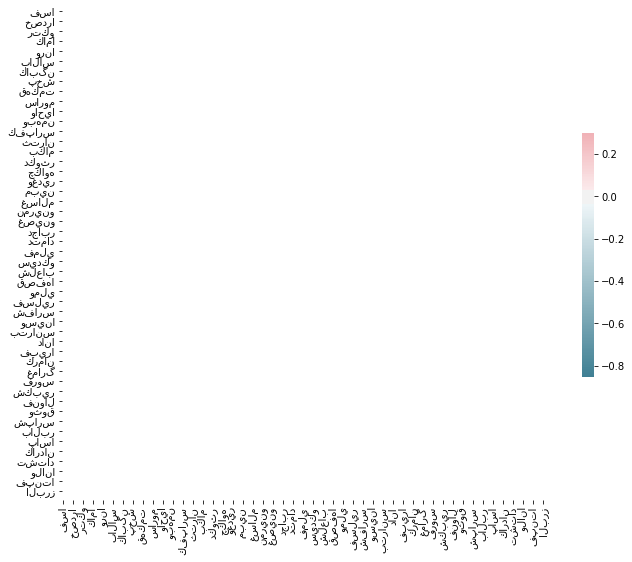

In [45]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})